In [1]:
import numpy as np
from diffusionpy import Diffusion_MS,vpure,dlnai_dlnxi,D_Matrix,Diffusion_MS_iter,lngi,time_dep_surface,dlnai_dlnxi_loop,DIdeal2DReal,Gammaij
import matplotlib.pyplot as plt

T=303.15
p=1E5
nc=4 # number of components
L=0.0185 # estimated thickness of the film

Dvec=np.asarray([1.00E-06,5.52E-9,5.52E-9,3.42E-08,3.42E-08,1.00E-21])
mobile=np.asarray([True,True,False,False])
wi0=np.asarray([0.100001667,0.799998333,0.03,0.07])
wi8=np.asarray([0.005951831,0.158725973,0.250596659,0.584725537])
taui=np.asarray([15711.02587,14926.92374])/3
kijvec=np.asarray([-0.045000,-0.022000,-0.128000,-0.001000,0.002673,-0.062100])
kijHBvec=np.asarray([0,0,0,0,-0.455211419,0])
Mi=np.asarray([18.015,46.069,357.79,65000.])
mi=np.asarray([1.2047,2.3827,14.283,2420.99])
sigi=np.asarray([2.79533,3.1771,3.535,2.947])
ui=np.asarray([353.95,198.24,262.791,205.27])
epsAiBi=np.asarray([2425.7,2653.4,886.4,0.])
kAiBi=np.asarray([0.045099,0.032384,0.02,0.02])
Na=np.asarray([1.,1.,3.,653.])
vpures=vpure(p,T,mi,sigi,ui,epsAiBi,kAiBi,Na)
t=np.asarray([0,3.660e+03, 7.260e+03, 1.098e+04, 1.446e+04, 1.794e+04, 1.986e+04,2.400e+04, 2.760e+04, 3.090e+04, 3.450e+04, 9.180e+04, 1.700e+06])
t=np.linspace(t[0],t[-1]**0.5,51)**2
D=D_Matrix(Dvec,nc)
kij=D_Matrix(kijvec,nc)
kijHB=D_Matrix(kijHBvec,nc)
par={"mi":mi,
"si": sigi,
"ui" :ui,
"eAi" :epsAiBi,
"kAi":kAiBi,
"NAi":Na,
"Mi": Mi,
"kij":kij,
"kijA":kijHB,
"vpure":vpures}
mobiles=np.where(mobile)[0]
# dlnai_dlnwi_fun=lambda wi: massbalancecorrection(dlnai_dlnxi_loop(T,np.ascontiguousarray(wi),**par)*wi[:,:,:,None],wi,wi0,Mi,mobile)
dlnai_dlnwi_fun=lambda wi: Gammaij(T,wi,par)
Dvec=np.asarray([1.00E-06,5.52E-9,5.52E-9,7.42E-8,7.42E-8,1.00E-21]) 
witB=time_dep_surface(t,wi0,wi8,mobile,taui)
wt,wtz,zvec,Lt=Diffusion_MS_iter(t,L,Dvec,wi0,wi8,mobile,full_output=True,dlnai_dlnwi_fun=dlnai_dlnwi_fun,witB=witB)


------------- Initialization and postprocessing ----------------
------------- Start diffusion modeling ----------------
------------- Diffusion modeling took 0.1422534 seconds ----------------
------------- Initialization and postprocessing took 0.0015154 seconds----------------
------------- Start PC-SAFT modeling ----------------
------------- PC-SAFT modeling took 1.8380061 seconds ----------------
------------- Initialization and postprocessing ----------------
------------- Start diffusion modeling ----------------
------------- Diffusion modeling took 0.3619645 seconds ----------------
------------- Initialization and postprocessing took 0.0020669 seconds----------------
------------- Start PC-SAFT modeling ----------------
------------- PC-SAFT modeling took 2.1208265 seconds ----------------
------------- Initialization and postprocessing ----------------
------------- Start diffusion modeling ----------------
------------- Diffusion modeling took 0.3910907 seconds -----------

C:\GitHub_Projects\diffusionpy\diffusionpy\diffusion.py:301: RuntimeWarning: invalid value encountered in divide
  a = df/dx


------------- PC-SAFT modeling took 1.6685327 seconds ----------------
------------- Initialization and postprocessing ----------------
------------- Start diffusion modeling ----------------
------------- Diffusion modeling took 0.4510162 seconds ----------------
------------- Initialization and postprocessing took 0.0033988 seconds----------------
iter 2: ||F|| = 0.00019724623354076793
iter 2: q = 0.45970132921503515
------------- Start PC-SAFT modeling ----------------
------------- PC-SAFT modeling took 1.687036 seconds ----------------
------------- Initialization and postprocessing ----------------
------------- Start diffusion modeling ----------------
------------- Diffusion modeling took 0.4455489 seconds ----------------
------------- Initialization and postprocessing took 0.0 seconds----------------
iter 3: ||F|| = 7.876308146451408e-05
iter 3: q = 0.4853977519751819
------------- Start PC-SAFT modeling ----------------
------------- PC-SAFT modeling took 1.7003791 seconds -

(0.0, 1.0)

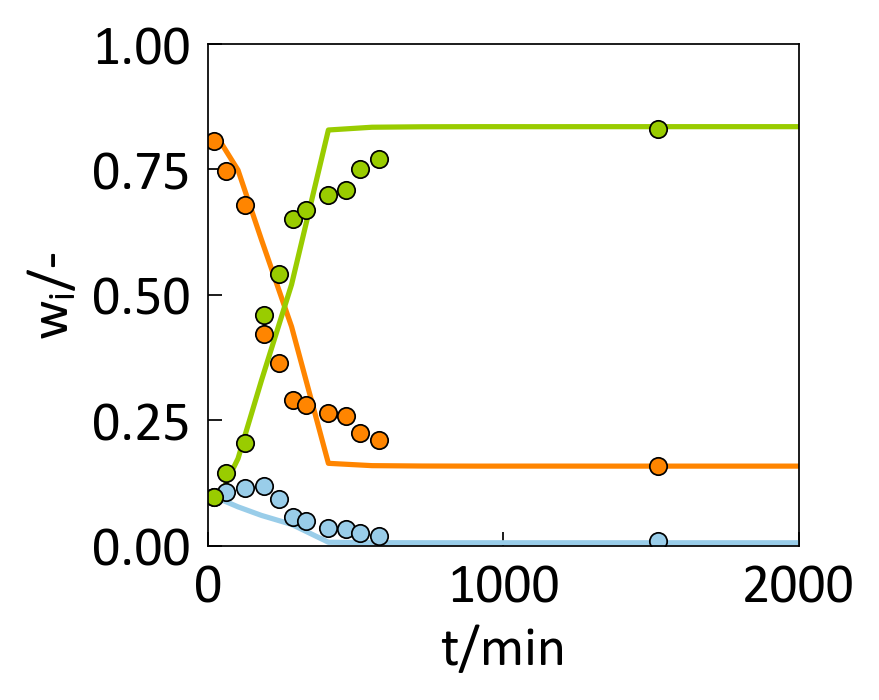

In [4]:
texp=np.asarray([20.83333333,62.5,125,191.6666667,241.6666667,287.5,333.3333333,408.3333333,466.6666667,516.6666667,579.1666667,1525])
w1exp=np.asarray([0.096803653,0.107468124,0.115349682,0.119496855,0.093297101,0.057657658,0.049818841,0.036231884,0.033423668,0.025157233,0.019927536,0.009981851])
w2exp=np.asarray([0.806392694,0.746812386,0.67938238,0.421383648,0.365036232,0.29009009,0.280797101,0.264492754,0.258355917,0.224618149,0.210144928,0.158802178])
w3exp=np.asarray([0.096803653,0.14571949,0.205267938,0.459119497,0.541666667,0.652252252,0.669384058,0.699275362,0.708220416,0.750224618,0.769927536,0.831215971])
fig,ax=plt.subplots()
ax.plot(t/60,wt[:,0],'C1-')
ax.plot(t/60,wt[:,1],'C3-')
ax.plot(t/60,wt[:,2]+wt[:,3],'C0-')
ax.plot(texp,w1exp,'C1o')
ax.plot(texp,w2exp,'C3o')
ax.plot(texp,w3exp,'C0o')
ax.set_xlabel("t/min")
ax.set_ylabel("$w_i$/-")

plt.xlim([0,2000])
plt.ylim([0,1])
